Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StanModels
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path_s("..", "scripts", "08")
cd(ProjDir)

### snippet 8.25

In [3]:
N = 100                                                    # individuals
height  = rand(Normal(10,2), N) ;              # sim total height of each
leg_prop = rand(Uniform(0.4,0.5), N);      # leg as proportion of height

sim left leg as proportion + error

In [4]:
leg_left = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

sim right leg as proportion + error

In [5]:
leg_right = leg_prop .* height .+  rand(Normal( 0 , 0.02 ), N);

combine into data frame

In [6]:
df =  DataFrame(height=height, leg_left = leg_left, leg_right = leg_right);

Show first 5 rows

In [7]:
first(df, 5)

,height,leg_left,leg_right
,Float64,Float64,Float64
1,8.4138,3.43834,3.46326
2,11.8655,5.76379,5.78663
3,8.7428,3.66821,3.69678
4,8.72407,4.08199,4.09597
5,6.59639,2.88578,2.92725


Define the Stan language model

In [8]:
m_5_8 = "
data{
    int N;
    real height[N];
    real leg_right[N];
    real leg_left[N];
}
parameters{
    real a;
    real bl;
    real br;
    real sigma;
}
model{
    vector[N] mu;
    sigma ~ cauchy( 0 , 1 );
    br ~ normal( 2 , 10 );
    bl ~ normal( 2 , 10 );
    a ~ normal( 10 , 100 );
    for ( i in 1:100 ) {
        mu[i] = a + bl * leg_left[i] + br * leg_right[i];
    }
    height ~ normal( mu , sigma );
}
";

Define the Stanmodel and set the output format to :mcmcchain.

In [9]:
stanmodel = Stanmodel(name="m_5_8", monitors = ["a", "br", "bl", "sigma"],
  model=m_5_8, output_format=:mcmcchain);
# Input data for cmdstan
m_8_8_data = Dict("N" => size(df, 1), "height" => df[:height],
    "leg_left" => df[:leg_left], "leg_right" => df[:leg_right]);
# Sample using cmdstan
rc, chn, cnames = stan(stanmodel, m_8_8_data, ProjDir, diagnostics=false,
  summary=false, CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)


File /Users/rob/.julia/dev/StanModels/scripts/08/tmp/m_5_8.stan will be updated.

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
          Mean        SD        Naive SE       MCSE      ESS
    a  0.77035363 0.29179891 0.00461374590 0.0054494664 1000
   bl -1.60812883 2.28873444 0.03618806892 0.0554986680 1000
   br  3.64932458 2.29428554 0.03627583948 0.0555917936 1000
sigma  0.62159202 0.04363499 0.00068992975 0.0011639240 1000

Quantiles:
          2.5%       25.0%       50.0%       75.0%      97.5%  
    a  0.17355478  0.58220125  0.7720625  0.965092500 1.3336542
   bl -6.06073875 -3.11998000 -1.6251050 -0.060126075 2.8378965
   br -0.84838975  2.08301250  3.6650900  5.172477500 8.1350785
sigma  0.54228687  0.59083100  0.6188815  0.650219000 0.7142015



Plot the density of posterior draws

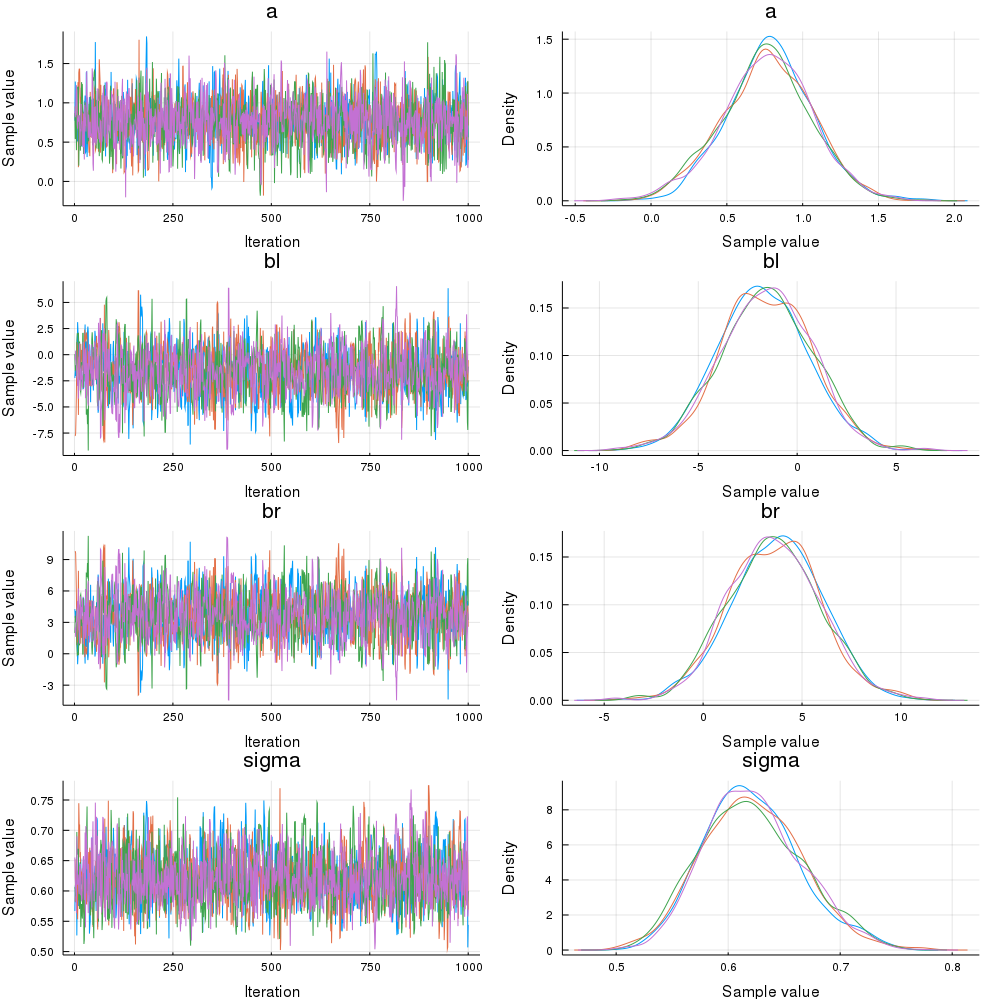

In [10]:
plot(chn)

Autocorrelation

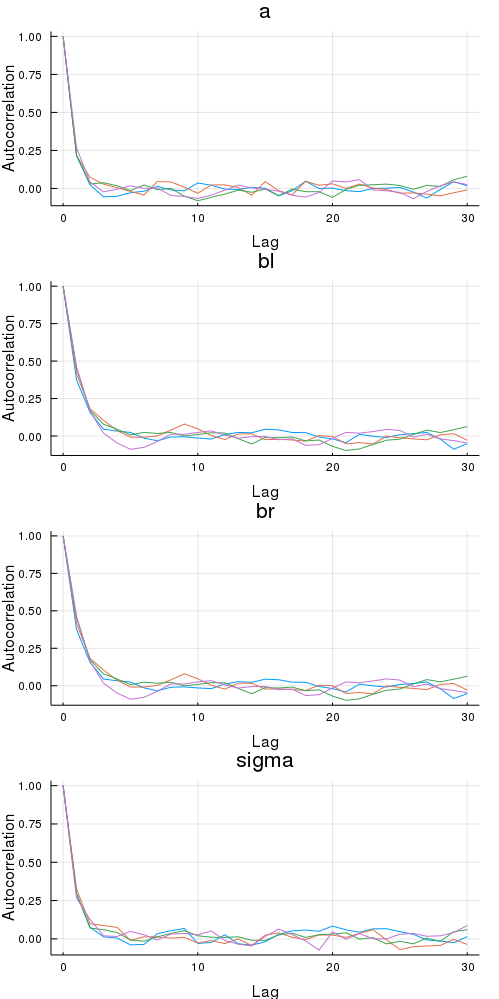

In [11]:
autocorplot(chn)

End of `08/m8.8s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*